<a href="https://colab.research.google.com/github/MaryamSayed01/Bank-System/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Phase 1:Load MNIST dataset**


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import keras
import keras.utils
from keras import utils as np_utils

In [ ]:
# mnist.load_data?

11501568/11490434 [==============================] - 0s 0us/step


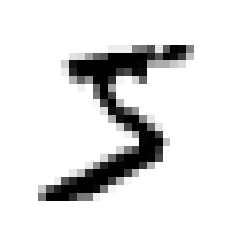

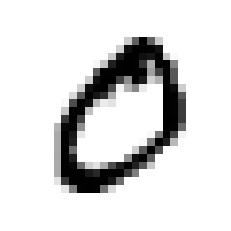

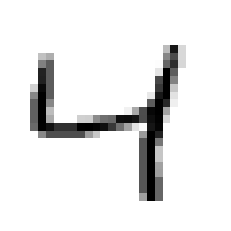

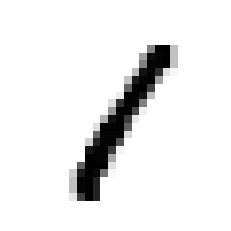

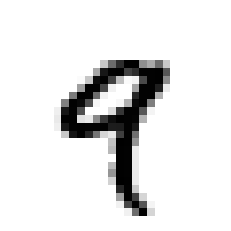

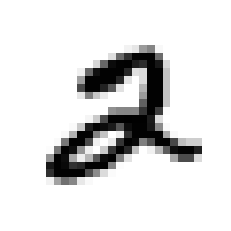

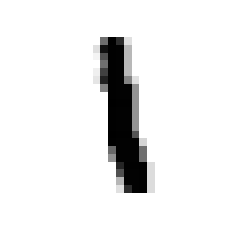

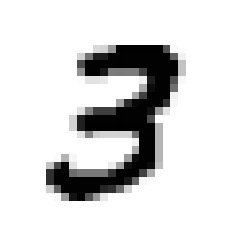

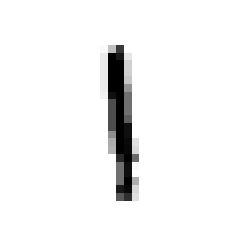

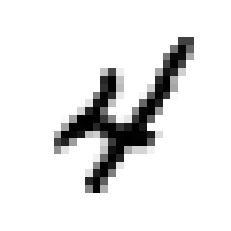

In [3]:
#Data is loaded as Matrix to Display the images we use imshow function
(X_train, y_train), (X_test, y_test)=mnist.load_data()
#ٍSee how Data imgs look like(We'll comment it in the future)
def plot_images(index):
  plt.imshow(X_train[index],cmap='binary')
  plt.axis('off')
  plt.show()
for i in range(10):
  plot_images(i)

## **Phase 2: Apply HOG features to the images**

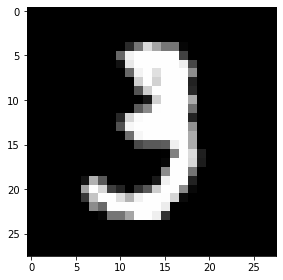

In [4]:
# Histogram of Oriented Gradients (HOG)
#steps: In HOG we have 2 important Value Gradients and Orientation 
#1- preprocess
#2-Calculate Gradients (x,y)[to find the small change in x and y axis]
  #we'll get 2 matrices one for x and the other for y Changes
#3-Calculate the Magnitude and Orientation for each pixle using gradients from previous step 
# (Total Gradient Magnitude =  √[(Gx)2+(Gy)2]),Orientation (tan(Φ) = Gy / Gx)
#4-Calculate Histogram of Gradients in 8×8 cells (9×1)[In this step we try to creat histogram using Gradients & oriantations]
  #If we divide the image into 8×8 cells and generate the histograms, we will get a 9 x 1 matrix for each cell
#5-Normalize gradients in 16×16 cell (36×1):We do thhis step to reduce lightinig that might be exsist in parts of any pic
  #we'll bw given vector then we calc its length and Normalize it by dividing by its length we'll get vector of size 36×1.
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
resized_img = resize(X_train[0], (128,64))
imshow(X_train[10])

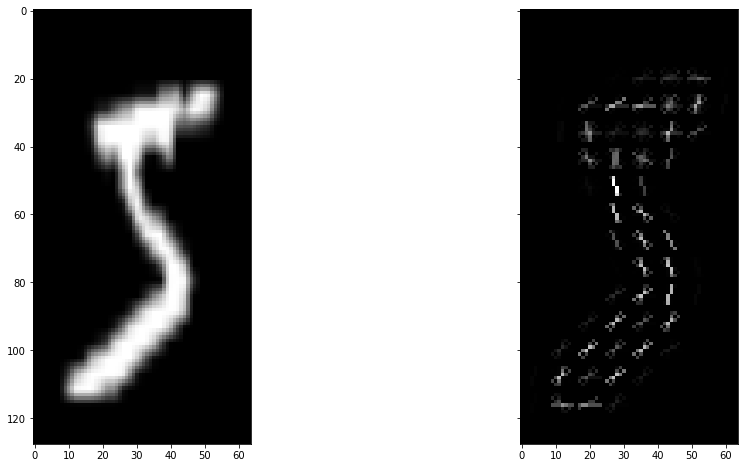

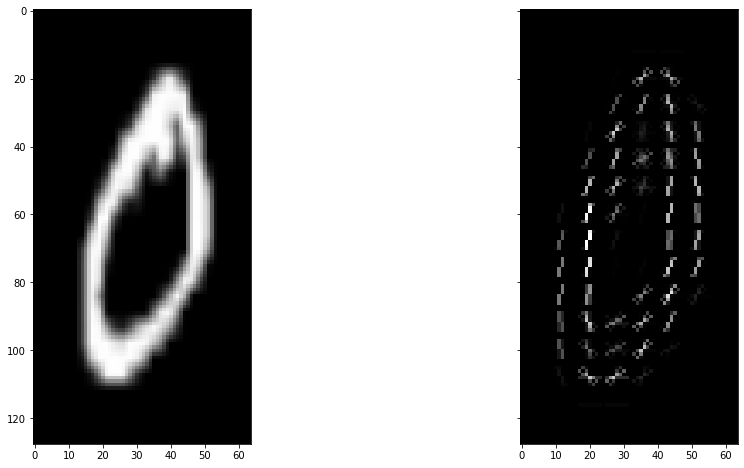

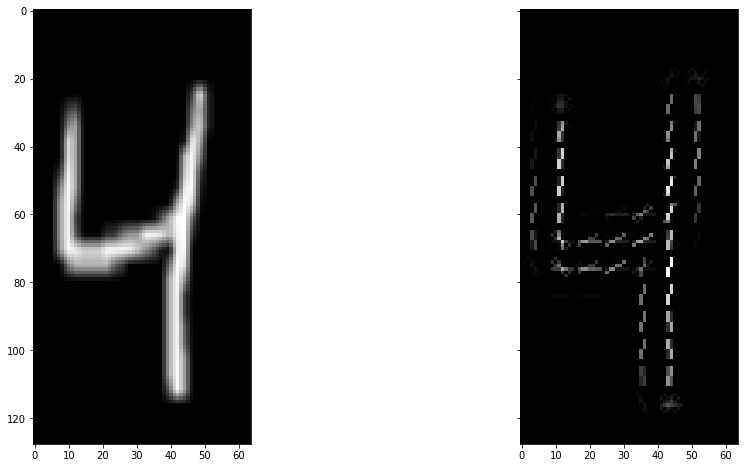

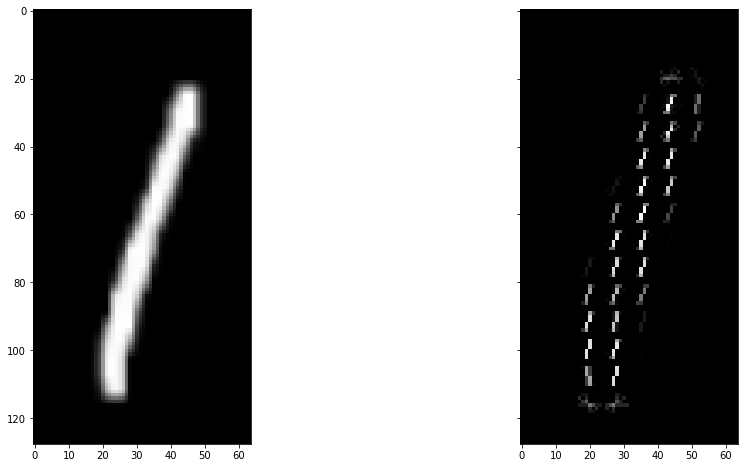

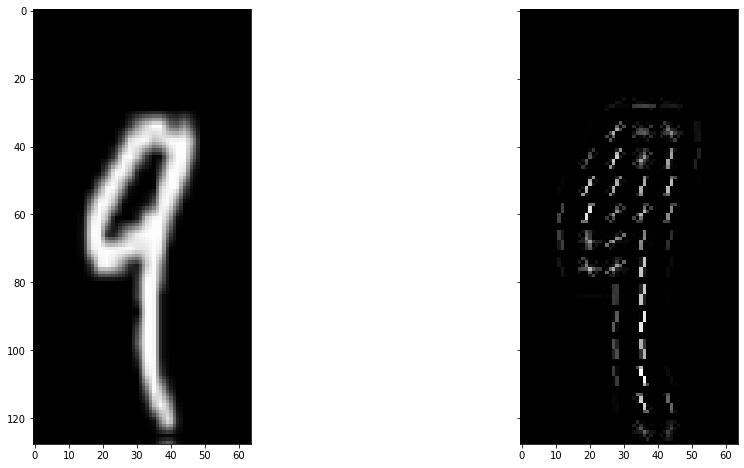

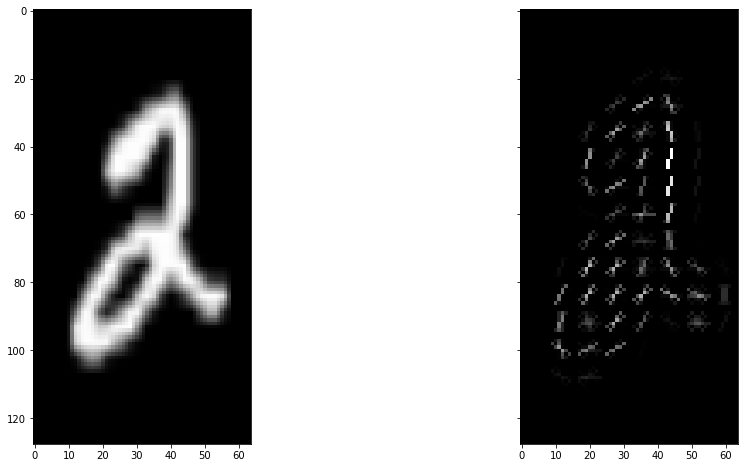

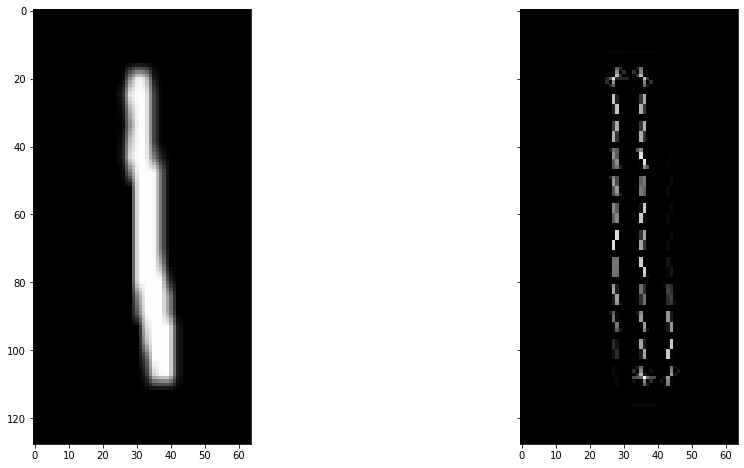

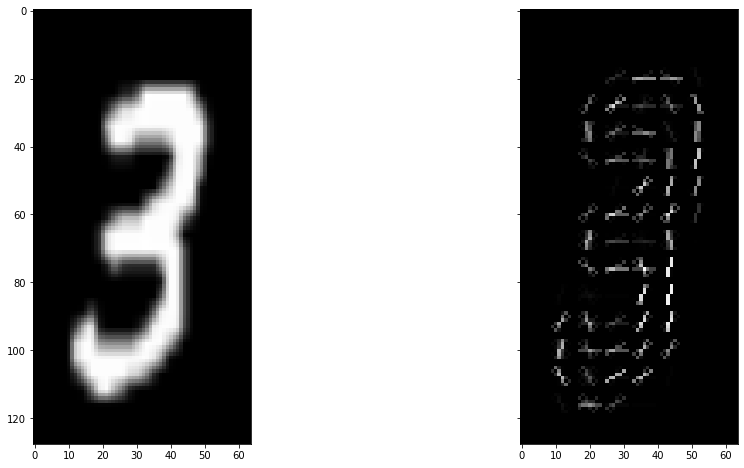

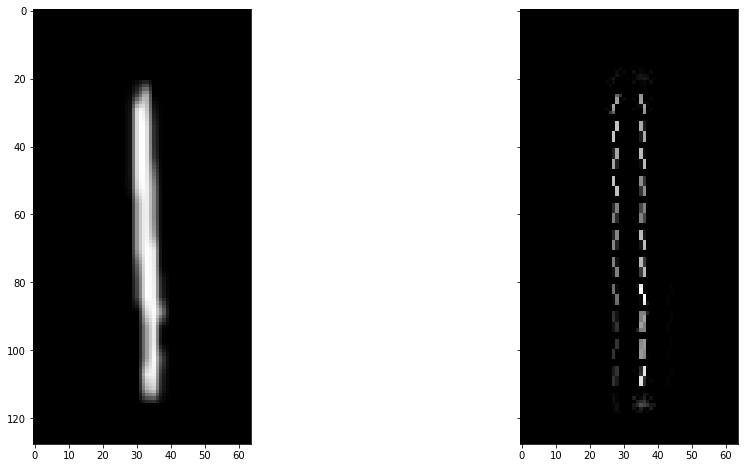

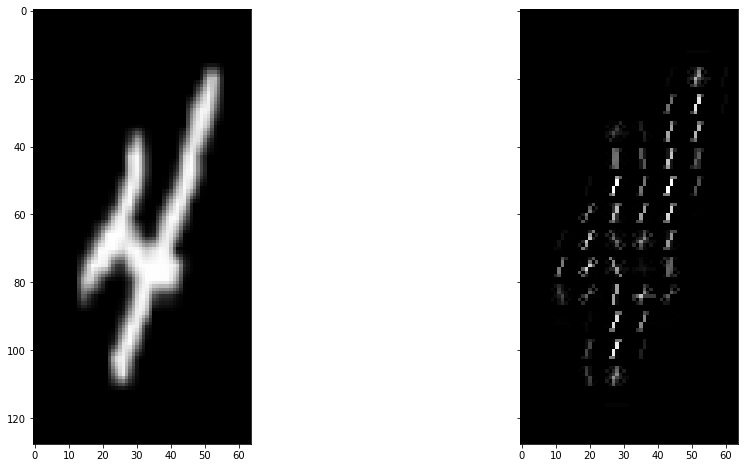

In [5]:
# imshow(imgg)
for i in range(10):
    resized_img = resize(X_train[i], (128,64))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
    ax1.imshow(resized_img, cmap=plt.cm.gray) 
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 
    imgg=ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    resized_img=hog_image_rescaled
  

In [ ]:
hog_image_rescaled.shape


(128, 64)

(28, 28)
(60000, 28, 28)
(28, 28)


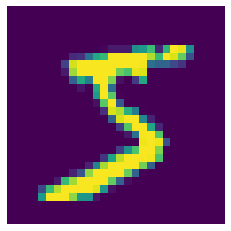

In [11]:
resized_img = resize(X_train[0], (28, 28))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255
arr= np.empty((60000, 28, 28), dtype='float32')
print(arr.shape)
np.append(arr,resized_img)
# print(arr[0].shape)

In [ ]:
#Resources
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
# https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog
# https://h1ros.github.io/posts/loading-scikit-learns-mnist-dataset/

# https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/

In [ ]:
# import tensorflow as tf
# from keras import utils as np_utils 
#PreProcess

#Reshape the Input to be 3D
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# #convert to vector
# y_train =  tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)
